In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import mglearn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/chenjunyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/chenjunyi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


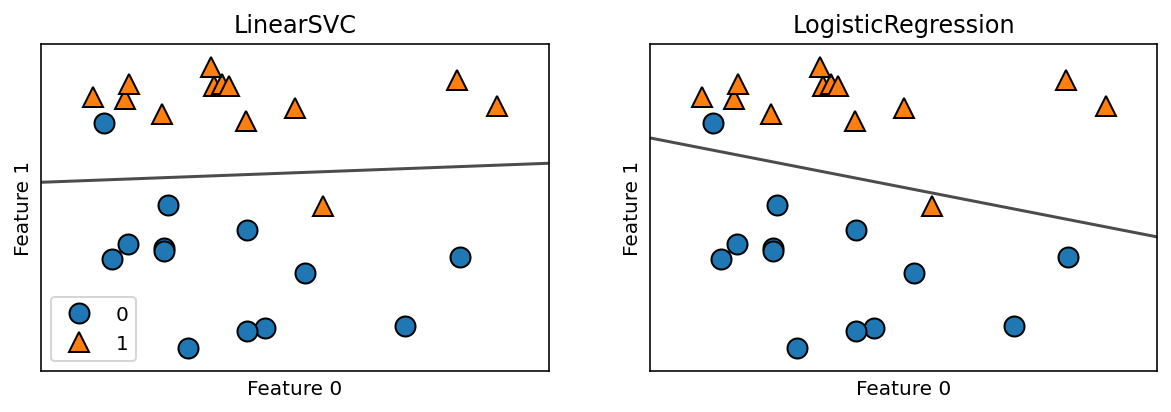

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                        ax=ax, alpha=.7) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__)) 
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

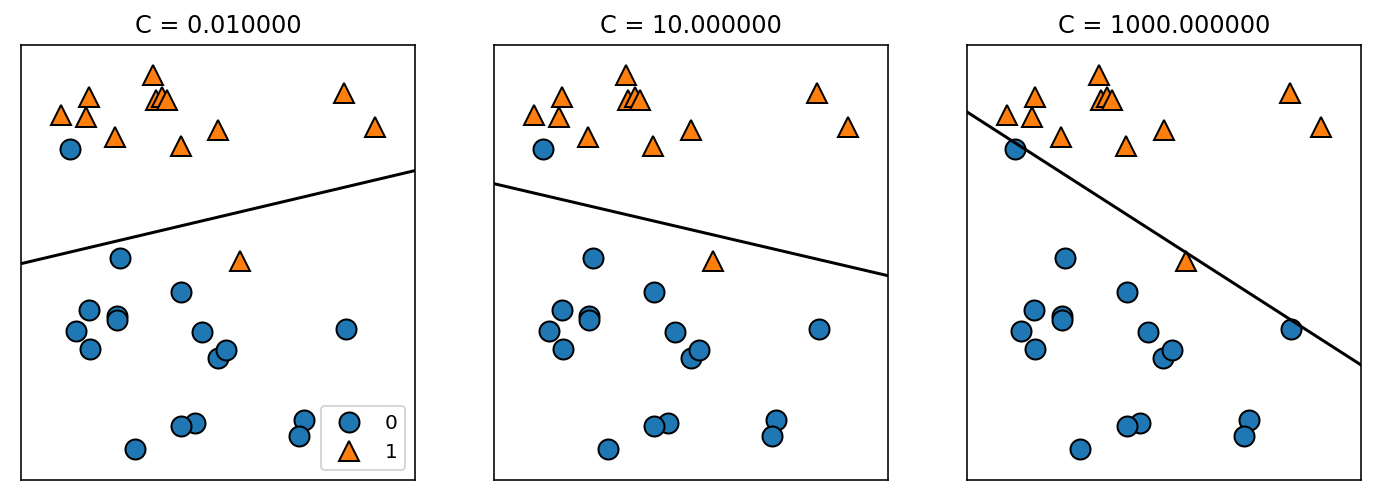

In [3]:
mglearn.plots.plot_linear_svc_regularization()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.958
Test set score: 0.958


In [5]:
logreg100 = LogisticRegression(C=100,max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.972


In [7]:
#c=0.01 正则化强，欠拟合
logreg001 = LogisticRegression(C=0.01,max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


In [13]:
print(logreg.coef_.T)

[[ 0.7401563 ]
 [ 0.13310628]
 [-0.2756418 ]
 [ 0.02639384]
 [-0.15297355]
 [-0.21331014]
 [-0.44091287]
 [-0.21522911]
 [-0.25869703]
 [-0.04288227]
 [-0.05296356]
 [ 1.21488619]
 [ 0.0340114 ]
 [-0.09454719]
 [-0.02020919]
 [ 0.02246273]
 [-0.06771598]
 [-0.03187317]
 [-0.03472615]
 [ 0.00648271]
 [ 0.10859083]
 [-0.38392563]
 [-0.07025353]
 [-0.01609354]
 [-0.29305944]
 [-0.83545015]
 [-1.37278844]
 [-0.49425874]
 [-0.70104892]
 [-0.11493918]]


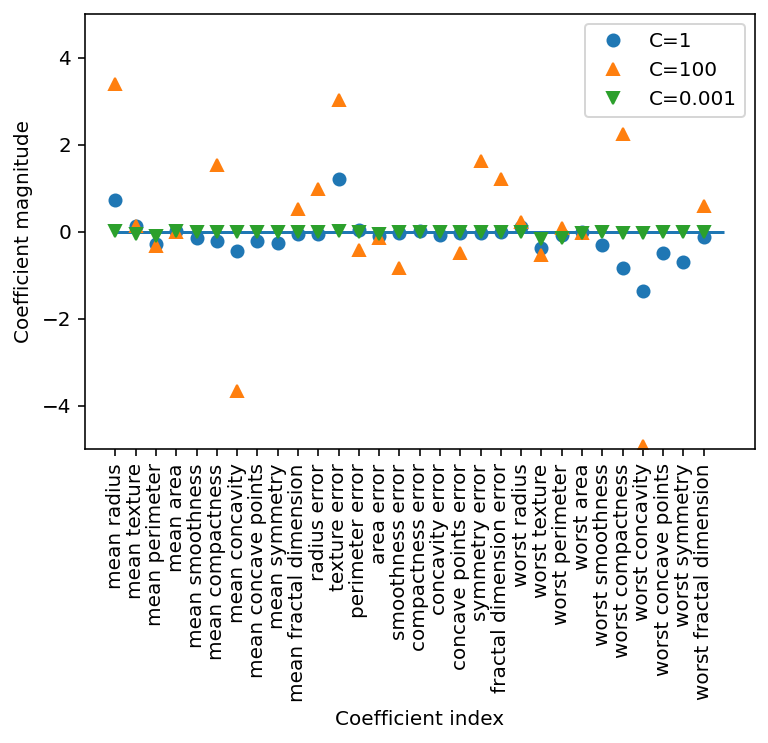

In [9]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100") 
plt.plot(logreg001.coef_.T, 'v', label="C=0.001") 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5) 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.legend()

### 多分类问题

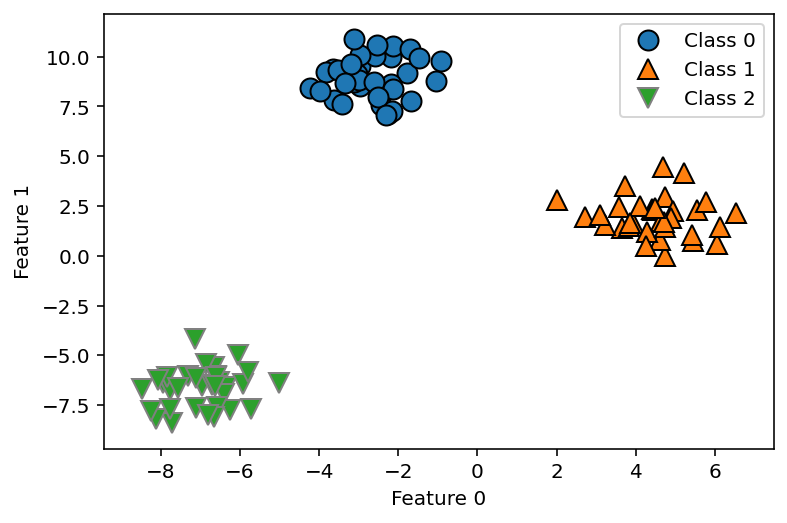

In [21]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [19]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape: ", linear_svm.coef_.shape) 
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


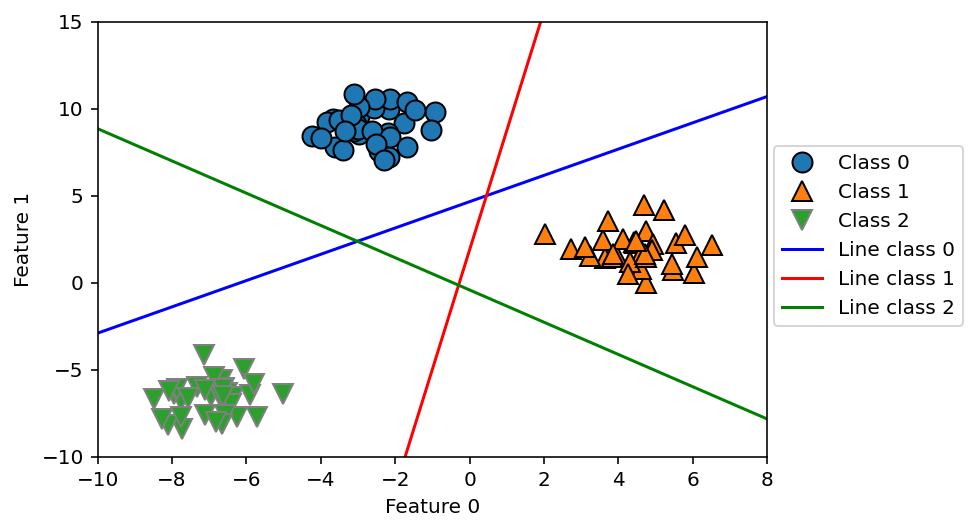

In [20]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

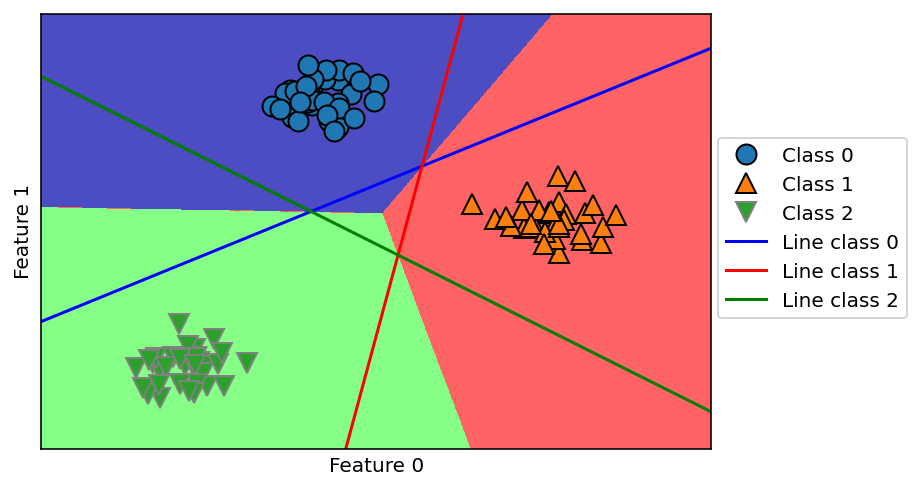

In [29]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']): 
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")